In [59]:
using Gadfly
using DataFrames

x = 1:20
function poission(lambda)
    function dist(k)
        k = BigFloat(k)
        return exp(-lambda) * ((lambda ^ k) / factorial(k))
    end 
    return dist
end

function binom(n, p)
    n = BigInt(n)
    function dist(k)
        return binomial(n, k) * ((1 - p) ^ (n - k)) * (p ^ k)
    end 
    return dist
end 

binom (generic function with 2 methods)

In [154]:
myp1 = poission(5)
myb1 = binom(10, 1/2)
myb2 = binom(20, 1/4)
myb3= binom(50, 1/10)
df = DataFrame(x=x, 
    p1=map(myp, x),
    b1=map(myb1, x),
    b2=map(myb2, x), 
    b3=map(myb3, x))
s = stack(df, [:p1, :b1, :b2, :b3])
d =Dict(
    :p1 => "Poisson(λ=5)",
    :b1 => "Binom(n=10, p=1/2)",
    :b2 => "Binom(n=20, p=1/4)",
    :b3 => "Binom(n=50, p=1/10)"
)
s[:Distribution]= map(x -> d[x], s[:variable])

80-element Array{String,1}:
 "Poisson(λ=5)"       
 "Poisson(λ=5)"       
 "Poisson(λ=5)"       
 "Poisson(λ=5)"       
 "Poisson(λ=5)"       
 "Poisson(λ=5)"       
 "Poisson(λ=5)"       
 "Poisson(λ=5)"       
 "Poisson(λ=5)"       
 "Poisson(λ=5)"       
 "Poisson(λ=5)"       
 "Poisson(λ=5)"       
 "Poisson(λ=5)"       
 ⋮                    
 "Binom(n=50, p=1/10)"
 "Binom(n=50, p=1/10)"
 "Binom(n=50, p=1/10)"
 "Binom(n=50, p=1/10)"
 "Binom(n=50, p=1/10)"
 "Binom(n=50, p=1/10)"
 "Binom(n=50, p=1/10)"
 "Binom(n=50, p=1/10)"
 "Binom(n=50, p=1/10)"
 "Binom(n=50, p=1/10)"
 "Binom(n=50, p=1/10)"
 "Binom(n=50, p=1/10)"

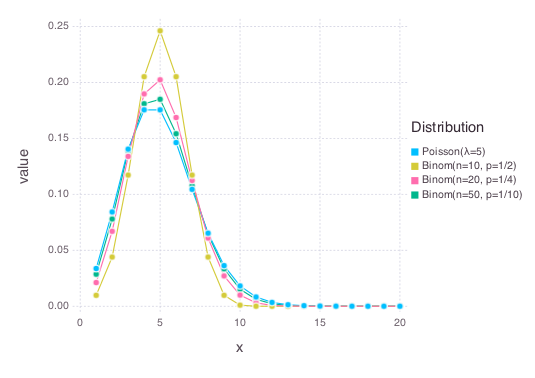

In [139]:
p = plot(s, Geom.point, Geom.line,x=:x, y=:value, color=:Distribution)

In [156]:
img = PNG("poisson_plot_mult.png", 6inch, 4inch)
draw(img, p)

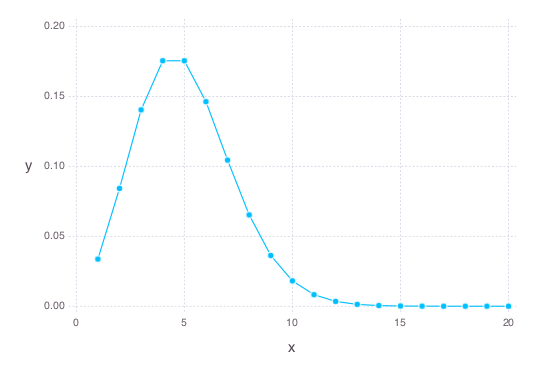

In [155]:
p2 = plot(Geom.point, Geom.line,x=x, y=map(myp1, x))

In [157]:
img = PNG("poisson_plot.png", 6inch, 4inch)
draw(img, p2)

In [150]:
filter

filter (generic function with 10 methods)